<a href="https://colab.research.google.com/github/samantha-olinsky/MA322-Python/blob/main/EDA_Lesson_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# one common Python package to handle dataframes is pandas
# the 'as' gives the package contents 'pandas' the reference name 'pd'

import pandas as pd
uc = pd.read_csv('https://raw.githubusercontent.com/mlhwang/ma322/master/usedcars.csv')

# lets make sure it was imported by printing it
print(uc) 


# the whole dataframe wasnt printed, 
# but this does give us an idea of the data included

     year model  price  mileage   color transmission
0    2011   SEL  21992     7413  Yellow         AUTO
1    2011   SEL  20995    10926    Gray         AUTO
2    2011   SEL  19995     7351  Silver         AUTO
3    2011   SEL  17809    11613    Gray         AUTO
4    2012    SE  17500     8367   White         AUTO
..    ...   ...    ...      ...     ...          ...
145  2006   SES   6200    95000  Silver         AUTO
146  2002    SE   5995    87003     Red         AUTO
147  2000    SE   5980    96841     Red         AUTO
148  2001    SE   4899   151479  Yellow         AUTO
149  2000    SE   3800   109259     Red         AUTO

[150 rows x 6 columns]


# **IMPORTANT THING TO NOTICE HERE**

When we printed the dataframe, the code is telling us that this data set has 150 rows and 6 columns.

However, the last row in our df is numbered 149 !! Why is this????

Well, if you look at the first row in the df, the very **FIRST** row is numbered **0**. This is a key feature of Python!

## Dataframes (and lists) are indexed starting at 0 in Python.

In [ ]:
# we can also examine just the top of the dataframe with 'head'
print(uc.head(15))

# we can look at the end of a dataframe with 'tail'
# print(uc.tail(3))

    year model  price  mileage   color transmission
0   2011   SEL  21992     7413  Yellow         AUTO
1   2011   SEL  20995    10926    Gray         AUTO
2   2011   SEL  19995     7351  Silver         AUTO
3   2011   SEL  17809    11613    Gray         AUTO
4   2012    SE  17500     8367   White         AUTO
5   2010   SEL  17495    25125  Silver         AUTO
6   2011   SEL  17000    27393    Blue         AUTO
7   2010   SEL  16995    21026  Silver         AUTO
8   2011   SES  16995    32655  Silver         AUTO
9   2010   SES  16995    36116  Silver         AUTO
10  2010   SES  16995    40539   Black         AUTO
11  2011   SES  16992     9199  Silver         AUTO
12  2011   SEL  16950     9388   Green         AUTO
13  2010   SES  16950    32058     Red         AUTO
14  2011    SE  16000    15367   White         AUTO


In [ ]:
# if I want to see just the FIRST row of the dataframe
# I need to use the index number of ZERO. 

print(uc.loc[0]) 

# ".loc" attached to the dataframe (uc) is an access method 
# specifically referring to the label index
# which means we need to provide the index number we want to access

year              2011
model              SEL
price            21992
mileage           7413
color           Yellow
transmission      AUTO
Name: 0, dtype: object


Now you may have noticed, someitmes we use parentheses `()` and this time we used a pair of square brackets `[]`.

**They are NOT interchangeable.**

For most of ***our*** scenarios:

**Parentheses** `()` will be used for invoking **functions**.

**Brackets** `[]` will be used for **selecting a subset** of a Python object.

You don't need to fully understand this right now, but keep it in mind for the future.

In [ ]:
# lets explore the data a bit more
print(uc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB
None


In [ ]:
# uc is a data frame : structured data set
# 150 obs = examples = rows = entries
# 6 VAR = columns = features
# int : integer / numeric
# object : character / string / categorical / nominal VAR 
# it has categories / levels / classes

In [ ]:
# frequency table, also called crosstabs
# univariate = one variable
# we still need the argument 'columns'
# so we'll just name the column 'count'
transmis_freq = pd.crosstab(index=uc["transmission"], columns="count")
# notice the brackets being used to SELECT "transmission" from uc
print(transmis_freq)

col_0         count
transmission       
AUTO            128
MANUAL           22


In [ ]:
# a relative frequency table uses percentages of the total
# instead of individual counts
color_freq_tab = pd.crosstab(index=uc["color"], columns="count")
print(color_freq_tab/color_freq_tab.sum())   # get % by dividing by the sum

col_0      count
color           
Black   0.233333
Blue    0.113333
Gold    0.006667
Gray    0.106667
Green   0.033333
Red     0.166667
Silver  0.213333
White   0.106667
Yellow  0.020000


In [ ]:
# we can also use crosstab to make multi-variable frequency tables

freq_tab2 = pd.crosstab(index=uc["transmission"], columns=uc["color"])
print(freq_tab2)

color         Black  Blue  Gold  Gray  Green  Red  Silver  White  Yellow
transmission                                                            
AUTO             26    17     1    14      4   24      28     12       2
MANUAL            9     0     0     2      1    1       4      4       1


AxesSubplot(0.260833,0.125;0.503333x0.755)


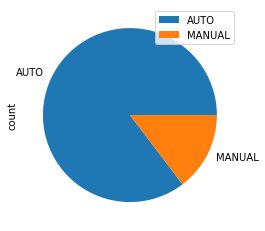

In [ ]:
# make a pie plot (pie chart) of the frequency table we created earlier
# need the y argument of the column name we want to look at
print(transmis_freq.plot.pie(y="count"))

AxesSubplot(0.260833,0.125;0.503333x0.755)
AxesSubplot(0.260833,0.125;0.503333x0.755)


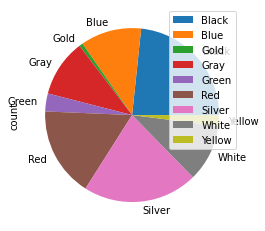

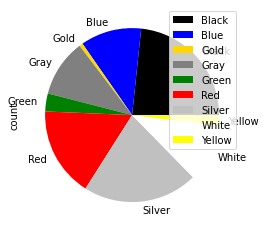

In [ ]:
# lets make another for color
print(color_freq_tab.plot.pie(y="count"))

# the colors are all wrong!
# computers are dumb
# we are smart humans and can fix it

print(color_freq_tab.plot.pie(y="count", colors=["black", "blue", "gold", "gray", "green", "red", "silver", "white", "yellow"]))

# much better!

### Something important to notice about the above code.

When we used brackets `[]` around the list of colors, it wasn't to select something. 

Another use of brackets is to tell Python that the contents are a **list**.

### Lists are an important datatype that can store a **sequence of information**.

Keep lists in mind as we keep learning more Python.

### Let's continue to explore our data. 

AxesSubplot(0.125,0.125;0.775x0.755)


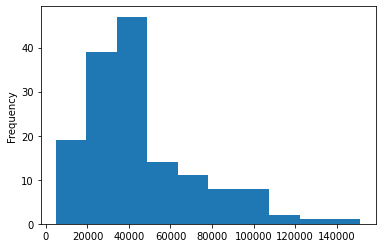

In [ ]:
print(uc["mileage"].plot.hist())


AxesSubplot(0.125,0.125;0.775x0.755)


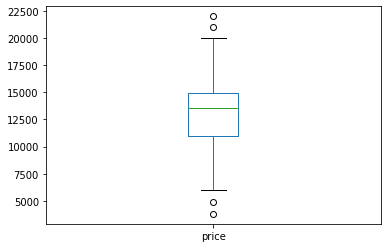

In [ ]:
print(uc["price"].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


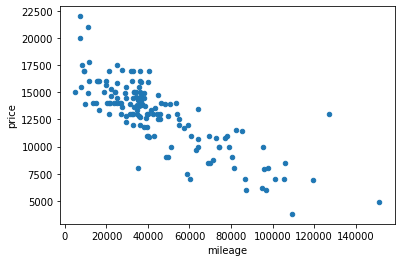

In [ ]:
# BIVARIATE analysis tools
# most common one that is used is a SCATTERPLOT
# scatterplot will take TWO QUANTITATIVE VARS

print(uc.plot.scatter(x="mileage", y="price"))


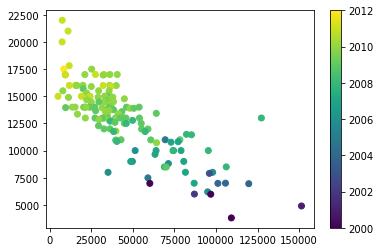

In [ ]:
# inorder to use scatter plots as a MULTIVARIATE analysis tools
# we need another python package
# lets import it
import matplotlib.pyplot as plt

# use the function 'scatter'
# we need to define the parameters for x and y variables
# and what data we want it to use
plt.scatter(x=uc['mileage'], y=uc['price'], c=uc['year'])

# 'c' is for color, and here we are using the values from 'year'
# we also can add a color bar as a key
plt.colorbar()

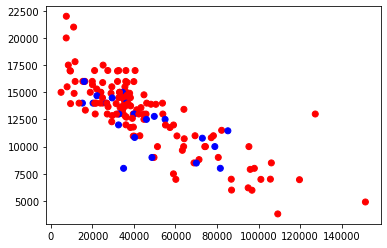

In [ ]:
# in the previous example,
# all the variables were numeric
# but that won't always be the case...

plt.scatter(x=uc['mileage'], y=uc['price'], c=uc['transmission'].map({'AUTO':'red', 'MANUAL': 'blue'})) 
                                                                   # don't worry too much right now about the curly braces {} 